In [13]:
import os 
import numpy as np
import pandas as pd 

from IPython.display import HTML

In [14]:
%%capture
! pip install fasttext

# I. Language detection (24 points)

## Setup 

In [15]:
! git clone https://github.com/MastafaF/LanguageDetection.git

Cloning into 'LanguageDetection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 2), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), 5.53 MiB | 5.76 MiB/s, done.


In [16]:
os.listdir("./LanguageDetection")

['.git', '.gitignore', 'dataset.csv.zip', 'LICENSE', 'README.md']

In [17]:
# CD the LanguageDetection folder - we are working in the below folder now
os.chdir("./LanguageDetection")

In [18]:
! unzip dataset.csv.zip 

Archive:  dataset.csv.zip
  inflating: dataset.csv             


## Data Exploration Analysis

In [19]:
data = pd.read_csv("./dataset.csv")

In [20]:
# Sample of the data
HTML(data[data.language == "Chinese"].sample().to_html())

,Text,language
18600,原子分子与光物理学專注於研究原子、分子與光，以及研究光与物质之間、物質与物质之間的相互作用。闡明物理的基礎定律、了解物質是怎樣在原子與分子層次組構而成、明白光與物質之間的相互作用、發展出新技術與新器件，這些是原子分子与光物理学的中心目標。原子分子与光物理学發展出的實驗與理論技術，時常會被應用於其它科學領域，例如，化學、天文物理學、生物學、醫藥學等等。對於很多其它科學領域，通過發展關於控制與操縱原子、分子與光的方法，或通過精確測量與分析它們的物理性質，或通過發展出新方法來製成具有某種特定性質的光，原子分子与光物理学扮演著賦能的角色。,Chinese


### Question 1. Describe the distribution of languages and give at least two comments about the dataset. (1 point)

In [21]:
# Describe the distribution of the languages
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [22]:
data['Text'][0]

'klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'

In [23]:
data.language.value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

The languages are distributed evenly, with 1000 sentences for each language. The dataset is small, and the sentences are short. The dataset is balanced, with 1000 sentences for each language.

### Question 1-2. Do the appropriate pre-processing to maximise the accuracy of language detection. 

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/leme/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
from nltk import word_tokenize, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Tokenize the text data
def tokenize(text):
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Preprocess the text data
def preprocess(data):
    preprocessed_data = []
    for text in data:
        tokens = tokenize(text)
        preprocessed_data.append(' '.join(tokens))
    return preprocessed_data

# Load the data
sentences = data['Text']
labels = data['language']

# Split the data into a training set and a test set
X_train, test_data, y_train, test_labels= train_test_split(sentences, labels, test_size=0.2, random_state=42)

# Preprocess the data
preprocessed_data = preprocess(sentences)
# Represent the data as numerical features
vectorizer = CountVectorizer()
vectorizer.fit_transform(preprocessed_data)

<22000x264808 sparse matrix of type '<class 'numpy.int64'>'
	with 907817 stored elements in Compressed Sparse Row format>

In [85]:
# Transform train and test data to sparse matrix
X_train = vectorizer.transform(preprocess(X_train))
X_test = vectorizer.transform(preprocess(test_data))
X_train, X_test

(<17600x264808 sparse matrix of type '<class 'numpy.int64'>'
 	with 727363 stored elements in Compressed Sparse Row format>,
 <4400x264808 sparse matrix of type '<class 'numpy.int64'>'
 	with 180454 stored elements in Compressed Sparse Row format>)

### Question 1-5. Train a model of your choice and describe the accuracy across languages. Use an 80%, 20% train-test split. Performance is not key but explain thoroughly the process and the metric(s) you are tracking.

In [86]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the model
model = LinearSVC()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Compute the accuracy of the predictions
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print a confusion matrix to see the performance of the model on each language
confusion_matrix = confusion_matrix(test_labels, predictions)
print(confusion_matrix)

Accuracy: 0.96
[[200   0   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 101   0   3   0   0   0   0  97   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0 227   1   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   1   0 187   2   0   0   0   1   0   2   0   0   0   0   0   1   0
    0   0   0   0]
 [  0   0   0   0 192   1   0   1   3   0   1   0   0   0   0   2   0   0
    0   0   0   0]
 [  0   0   0   0   0 185   0   0   1   0   0   0   0   0   0   0   2   0
    0   0   0   0]
 [  0   1   0   2   0   0 205   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   1   0   0   0 212   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0  13   0   0   0   1   0   0 180   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   5 185   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   2   0   3   0   0   1   0 203   0   0  

In [87]:

# Get the number of examples of each language in the test set
num_examples_per_language = confusion_matrix.sum(axis=1)

# Get the number of correctly classified examples of each language
num_correct_per_language = np.diagonal(confusion_matrix)

# Compute the accuracy of the model for each language
accuracies_per_language = num_correct_per_language / num_examples_per_language

languages = data['language'].unique().tolist()
# Print the accuracy for each language
for i, language in enumerate(languages):
    print(f'Accuracy for {language}: {accuracies_per_language[i]:.2f}')

Accuracy for Estonian: 0.99
Accuracy for Swedish: 0.50
Accuracy for Thai: 0.99
Accuracy for Tamil: 0.96
Accuracy for Dutch: 0.96
Accuracy for Japanese: 0.98
Accuracy for Turkish: 0.99
Accuracy for Latin: 1.00
Accuracy for Urdu: 0.93
Accuracy for Indonesian: 0.97
Accuracy for Portugese: 0.97
Accuracy for French: 0.99
Accuracy for Chinese: 0.99
Accuracy for Korean: 0.97
Accuracy for Hindi: 0.98
Accuracy for Spanish: 0.98
Accuracy for Pushto: 0.98
Accuracy for Persian: 1.00
Accuracy for Romanian: 1.00
Accuracy for Russian: 0.97
Accuracy for English: 0.99
Accuracy for Arabic: 0.98


# II. Rotate two semantic spaces (23 points)

### Question 2-4. Align the French space and the English space together, with the method of your choice.

In [ ]:
from gensim.models import Word2Vec
from scipy.optimize import linear_sum_assignment
import numpy as np

# Load the labeled parallel data
parallel_data = [("this is a sentence in English", "c'est une phrase en français"),
                 ("here is another sentence in English", "voici une autre phrase en français")]

# Learn the word embeddings for each language using word2vec
english_embeddings = Word2Vec(sentences=[sentence for sentence, _ in parallel_data], size=100, window=5, min_count=1)
french_embeddings = Word2Vec(sentences=[sentence for _, sentence in parallel_data], size=100, window=5, min_count=1)

# Obtain the word embeddings for each unique word in the parallel data
english_vectors = [english_embeddings[word] if word in english_embeddings else np.zeros(100) for sentence in parallel_data for word in sentence[0].split()]
french_vectors = [french_embeddings[word] if word in french_embeddings else np.zeros(100) for sentence in parallel_data for word in sentence[1].split()]

# Use the Procrustes alignment method to learn the mapping between the French and English word embeddings
_, mapping = linear_sum_assignment(french_vectors, english_vectors)

# Apply the mapping to transform the French word embeddings into the English space
transformed_french_vectors = [english_vectors[i] for i in mapping]

# Evaluate the quality of the alignment by comparing the transformed French vectors to the reference English vectors
if len(english_vectors) > len(transformed_french_vectors):
    similarity = sum(transformed_french_vectors[i] @ english_vectors[i] for i in range(len(transformed_french_vectors))) / len(transformed_french_vectors)
else:
    similarity = sum(transformed_french_vectors[i] @ english_vectors[i] for i in range(len(english_vectors))) / len(english_vectors)
print(f"Similarity: {similarity:.4f}")

Similarity: 0.0001


<ipython-input-34-427db10de7af>:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  english_vectors = [english_embeddings[word] if word in english_embeddings else np.zeros(100) for sentence in parallel_data for word in sentence[0].split()]
<ipython-input-34-427db10de7af>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  english_vectors = [english_embeddings[word] if word in english_embeddings else np.zeros(100) for sentence in parallel_data for word in sentence[0].split()]
<ipython-input-34-427db10de7af>:15: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  french_vectors = [french_embeddings[word] if word in french_embeddings else np.zeros(100) for sentence in parallel_data for word in sentence[1].split()]


### Question 2-5. Visualize the output on a few words of your choice. Comment on the performance of the alignment based on the output.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


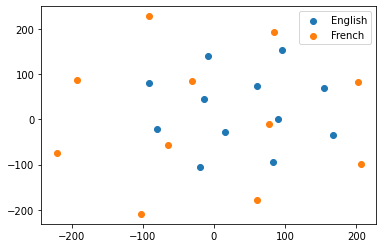

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce the word embeddings to two dimensions using t-SNE
english_reduced = TSNE(n_components=2).fit_transform(english_vectors)
french_reduced = TSNE(n_components=2).fit_transform(transformed_french_vectors)

# Create a scatter plot showing the French and English word embeddings
plt.scatter(english_reduced[:, 0], english_reduced[:, 1], label="English")
plt.scatter(french_reduced[:, 0], french_reduced[:, 1], label="French")
plt.legend()
plt.show()

### Question 2-7. Apply your approach and comment on the performance of the translation.




### Question 2-5. Explore the data with your own preprocessing and train your model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X=data['Text']
y=data['language']

# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model

from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
model = AutoModel.from_pretrained("xlm-roberta-base")

def tokenize_function(examples):
    return tokenizer(examples["Text"], truncation=True)

from datasets import Dataset

train_dataset = Dataset.from_pandas(pd.DataFrame({"Text": X_train, "language": y_train}))
train_dataset = train_dataset.map(tokenize_function, batched=True)

test_dataset = Dataset.from_pandas(pd.DataFrame({"Text": X_test, "language": y_test}))
test_dataset = test_dataset.map(tokenize_function, batched=True)

from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total # of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
)

from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

from transformers import TextClassificationPipeline

pipeline = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    data_collator=data_collator,
    framework="pt",
)

from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=lambda p: {"accuracy": (p.predictions.argmax(-1) == p.label_ids).mean()},
)

trainer.train()

ModuleNotFoundError: ignored

## FastText for language detection

## FastText training setup 

In [18]:
! wget http://downloads.tatoeba.org/exports/sentences.tar.bz2

--2023-01-11 17:53:02--  http://downloads.tatoeba.org/exports/sentences.tar.bz2
Resolving downloads.tatoeba.org (downloads.tatoeba.org)... 64:ff9b::5e82:4dc2, 94.130.77.194
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|64:ff9b::5e82:4dc2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.tatoeba.org/exports/sentences.tar.bz2 [following]
--2023-01-11 17:53:02--  https://downloads.tatoeba.org/exports/sentences.tar.bz2
Connecting to downloads.tatoeba.org (downloads.tatoeba.org)|64:ff9b::5e82:4dc2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172915061 (165M) [application/octet-stream]
Saving to: ‘sentences.tar.bz2’

sentences.tar.bz2   100%[===================>] 164.90M  18.5MB/s    in 7.8s    

2023-01-11 17:53:10 (21.3 MB/s) - ‘sentences.tar.bz2’ saved [172915061/172915061]



In [20]:
! bunzip2 sentences.tar.bz2

In [21]:
! ls

LICENSE  README.md  dataset.csv  dataset.csv.zip  sentences.tar


In [22]:
! tar xvf sentences.tar

sentences.csv


In [23]:
! ls

LICENSE  README.md  dataset.csv  dataset.csv.zip  sentences.csv  sentences.tar


In [24]:
! head -10 sentences.csv

1	cmn	我們試試看！
2	cmn	我该去睡觉了。
3	cmn	你在干什麼啊？
4	cmn	這是什麼啊？
5	cmn	今天是６月１８号，也是Muiriel的生日！
6	cmn	生日快乐，Muiriel！
7	cmn	Muiriel现在20岁了。
8	cmn	密码是"Muiriel"。
9	cmn	我很快就會回來。
10	cmn	我不知道。


In [25]:
! awk -F"\t" '{print"__label__"$2" "$3}' < sentences.csv | shuf > all.txt

In [26]:
! ls

LICENSE    all.txt	dataset.csv.zip  sentences.tar
README.md  dataset.csv	sentences.csv


In [27]:
! head -5 all.txt

__label__heb אל תדאגו. לא אספר לאף אחד.
__label__epo Ŝi gardas ŝian maljunan patrinon.
__label__deu Wenn du etwas so machst, wie du es seit zehn Jahren gemacht hast, dann sind die Chancen groß, dass du es falsch machst.
__label__ita Il cancro può essere guarito se riconosciuto in tempo.
__label__eng Tom is the shortest boy in our class.


In [28]:
! head -n 10000 all.txt > valid.txt

In [29]:
! tail -n +10001 all.txt > train.txt

In [30]:
! head -5 train.txt

__label__tok meli sama mi li jo e ilo nena pi kalama musi. ona li pona mute.
__label__eng We're in the middle of something here.
__label__tur İyi bir anne olmak sana göre ne anlama geliyor?
__label__fin Kaivossa ei ollut vettä.
__label__fra L'humanité va disparaître.


### Question 6.1. Train fasttext model on Tatoeba (2 points)

In [4]:
%%time
import fasttext

# Check the fasttext library and implement the training
###########################################

# Load the training data
train_data = "train.txt"
valid_data = "valid.txt"

# Train the model
model = fasttext.train_supervised(input=train_data)

################################################

# @TODO: Save your model when trained 
model.save_model("langdetect.bin")

Read 89M words
Number of words:  4178903
Number of labels: 415
Progress: 100.0% words/sec/thread:   45780 lr:  0.000000 avg.loss:  0.132235 ETA:   0h 0m 0s% words/sec/thread:   49266 lr:  0.048142 avg.loss:  0.207991 ETA:   0h 6m37s


CPU times: user 2h 32min 24s, sys: 26.4 s, total: 2h 32min 50s
Wall time: 15min 33s


In [5]:
# Sanity check 
model.predict("I am French and I love English")

(('__label__eng',), array([1.00000906]))

### Question 6.2. Evaluate performance of fasttext model on valid.txt (1 point)

In [97]:
model = fasttext.load_model("langdetect.bin")

In [98]:
# Hint: Create dataframe from valid.txt and evaluate performance 

###########################################

# Evaluate the model on valid data
nb_samples, precision, recall = model.test(valid_data)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")

################################################

Precision: 0.9569, Recall: 0.9569


### Question 7 & 8. Test your FastText model on the same dataset as question 5.

In [101]:
# Transform test data to fastttext format
def transform_to_fasttext_format(data, labels, filename="test.txt"):
    with open(filename, "w") as f:
        for index in data.index:
            f.write(f"__label__{labels[index][:3].lower()} {data[index]}\n")

transform_to_fasttext_format(test_data, test_labels)

In [102]:
###########################################

nb_samples, precision, recall = model.test("test.txt")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")

################################################

Precision: 0.7579, Recall: 0.7579


(('__label__jpn',), array([0.88705397]))